# 로지스틱 회귀분석

판별분석은 독립변수들이 다변량 정규분포를 따라야 한다는 가정이 필요하다.<br>
따라서 독립변수들이 이러한 가정을 따르지 않고 이산형과 연속형의 혼합인 경우 classification에 적합한 것이 로지스틱 회귀이다. 

$$0 < p < 1$$

$$0 < \frac{p}{1-p} < \infty$$

로그를 씌우면

$$-\infty < log(\frac{p}{1-p}) < \infty$$

$$\hat{y} = log(\frac{p}{1-p}) = \beta_0 + \beta_1x$$

$$p = {e^{\beta_0+\beta_1x} \over 1 + e^{\beta_0+\beta_1x}}$$

이 때 x를 x축 p를 y축으로 하여 그래프를 그리면

x와 p는 s자 형태의 로지스틱 함수 모양을 그리게 된다.

여기서 $\frac{p}{1-p}$를 오즈 odds라고 하며 개체와 개체의 오즈의 비를 살펴 보게 된다.

$$OddsRate = \frac{\frac{1-p_i}{p_i}}{\frac{1-p_j}{p_j}}$$

## 예제

### 약 

In [1]:
library(xlsx)

In [3]:
drug.data <- read.xlsx("mvadata/drug.xlsx", sheetIndex = 1)

In [4]:
str(drug.data)

'data.frame':	100 obs. of  3 variables:
 $ id      : num  1 2 3 4 5 6 7 8 9 10 ...
 $ age     : num  20 23 24 25 26 27 27 28 29 29 ...
 $ purchase: num  0 0 0 1 0 0 0 0 0 0 ...


In [5]:
attach(drug.data)

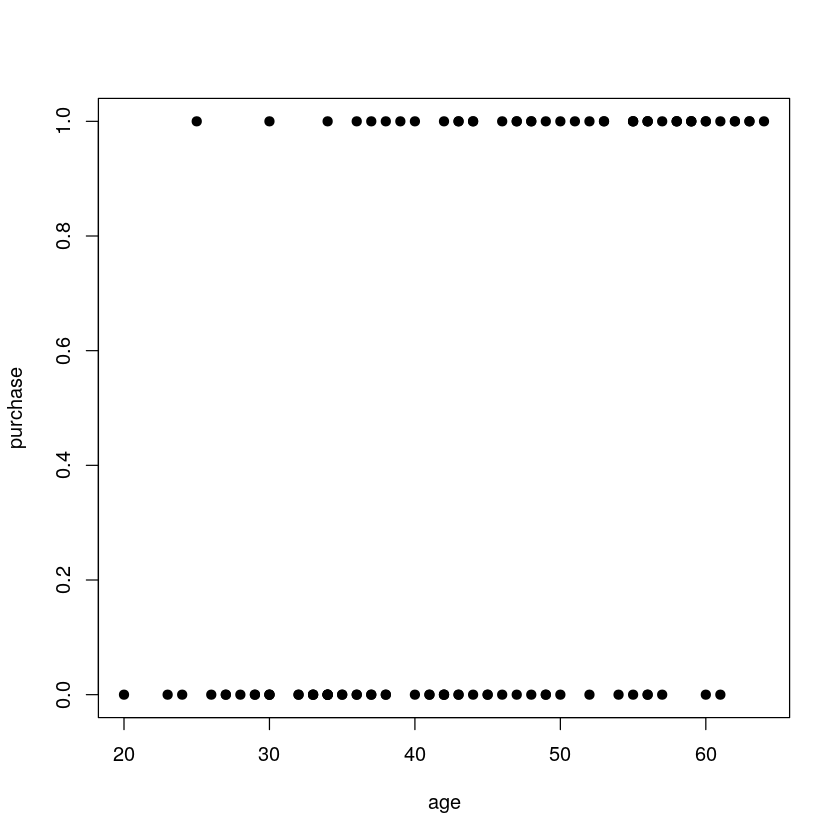

In [6]:
plot(age, purchase, pch = 19)

In [7]:
agr = cut(age, breaks = c(20, 30, 35, 40, 45, 50, 55, 60, 65), include.lowest = T,
         right = F, labels = c(1, 2, 3, 4, 5, 6, 7, 8))

In [8]:
agr

[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7
 [75] 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8
Levels: 1 2 3 4 5 6 7 8

In [9]:
purchase.table <- table(agr, purchase)

In [10]:
purchase.table

   purchase
agr  0  1
  1  9  1
  2 13  2
  3  8  4
  4  9  6
  5  7  6
  6  3  5
  7  4 13
  8  2  8

In [11]:
percent.table <- prop.table(purchase.table, 1)
percent.table

   purchase
agr         0         1
  1 0.9000000 0.1000000
  2 0.8666667 0.1333333
  3 0.6666667 0.3333333
  4 0.6000000 0.4000000
  5 0.5384615 0.4615385
  6 0.3750000 0.6250000
  7 0.2352941 0.7647059
  8 0.2000000 0.8000000

In [12]:
prc.1 = percent.table[,2]

In [14]:
agr.1 = as.numeric(rownames(percent.table))

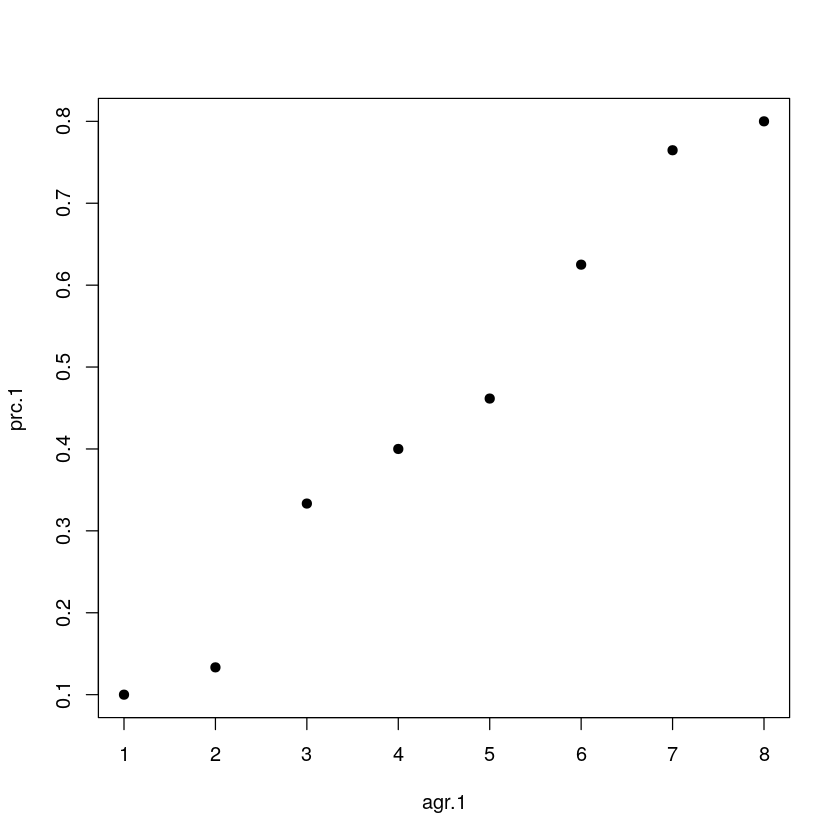

In [18]:
plot(agr.1, prc.1, pch = 19)

로지스틱 함수 형태

### 잔디깎기 mower

In [19]:
mower.data = read.xlsx("mvadata/mower.xlsx", 1)

In [20]:
str(mower.data)

'data.frame':	24 obs. of  3 variables:
 $ owner : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ income: num  20 28.5 21.6 20.5 29 36.7 36 27.6 23 31 ...
 $ size  : num  9.2 8.4 10.8 10.4 11.8 9.6 8.8 11.2 10 10.4 ...


In [43]:
mower.logit = glm(owner~., family = binomial, data = mower.data)

로지스틱 회귀 함수 glm

In [44]:
summary(mower.logit)


Call:
glm(formula = owner ~ ., family = binomial, data = mower.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.74044  -0.29685   0.00439   0.44750   1.86821  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -25.9382    11.4871  -2.258   0.0239 *
income        0.3326     0.1629   2.042   0.0412 *
size          1.9276     0.9256   2.083   0.0373 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 33.271  on 23  degrees of freedom
Residual deviance: 15.323  on 21  degrees of freedom
AIC: 21.323

Number of Fisher Scoring iterations: 6


$$ p = {exp(-25.9382+0.3326income+1.9276size) \over 1+exp(-25.9382+0.3326income+1.9276size)}$$

계수의 부호를 보았을 때 수입이 클 수록, 집 크기가 클 수록 잔디깎는 기계를 소유하고 있을 확률이 높다.

In [24]:
exp(0.3326)

[1] 1.394589

수입이 1 증가할 때마다 오즈는 1.39배 높아진다.

In [25]:
exp(1.9276)

[1] 6.872995

집 크기가 1 증가할 때마다 오즈는 6.87배 증가한다.

p-value로 각 계수가 유의한지 봐야한다.

residual deviance의 통계량은 카이제곱 통계량이다. 이 회귀식이 유의한지 살펴본다.

In [27]:
1-pchisq(15.323, 21)

[1] 0.8064027

H0: 모형이 적합하다.
H1: 모형이 적합하지 않다.
p-value가 0.8로 H0가 기각되지 않으므로 이 모형은 적합하다.

In [28]:
mower.predict = predict(mower.logit, newdata = mower.data, type = "response")

각 개체별 추정된 p값을 계산하는 predict 함수

In [30]:
pred <- factor(ifelse(mower.predict < 0.5, "no", "yes"))

In [31]:
cnfm <- table(mower.data$owner, pred)

In [32]:
cnfm

     pred
      no yes
  no  10   2
  yes  2  10

In [33]:
error <- 1-(sum(diag(cnfm)) / sum(cnfm))
error

[1] 0.1666667

오류율은 16.7퍼센트 

#### Rweka 

In [38]:
library(RWeka)

In [39]:
mower.m <- Logistic(owner~., data = mower.data)

In [40]:
summary(mower.m)


=== Summary ===

Correctly Classified Instances          20               83.3333 %
Incorrectly Classified Instances         4               16.6667 %
Kappa statistic                          0.6667
Mean absolute error                      0.2094
Root mean squared error                  0.328 
Relative absolute error                 41.8733 %
Root relative squared error             65.5928 %
Total Number of Instances               24     

=== Confusion Matrix ===

  a  b   <-- classified as
 10  2 |  a = no
  2 10 |  b = yes